# Project: Investigate a TMDb Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#conclusions">References</a></li>    
</ul>

<a id='intro'></a>
## Introduction



Investigating a TMDb movie Dateset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue,budget,production companies,director,release year.


### What kinds of properties are associated with top 500 profitable movies of all time?

> 1.Top 500 Profitable Movie and their genre count 

> 2.which cast or actor is mostly occur in top 500 profitable movie?

> 3.Top 10 production house that produces most movie in top 500 profitable movies all time.

> 4.How runtime of top 500 profitable movie are spread and their counts(histogram)?

> 5.Top 500 profitable movies frequently occuring top 10 directors and their count(number of time they directed movie)? 

> 6.Yearwise profit earn by movies alltime

> 7.Top 10 production house collboration that generated most profit in top 500 profitable list alltime 

### What kinds of properties are associated with movies that have high revenues and high budget?

>  1.Does Popularity of movie depend on budget because higher budget lead to high spending of advertisement and movie promotion?

>  2.Does Popularity of movie depend on budget because higher budget lead to high spending of advertisement and movie promotion?

>  3.Does Popularity of movie leads to high revenue ?

>  4.Does popularity of movie industry  changes over time and How?



In [441]:
import pandas as pd
import numpy as np
import unicodecsv
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [442]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
tmdb_list = pd.read_csv('tmdb-movies.csv')
tmdb_list.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [443]:
rows, col = tmdb_list.shape
print('we have {} entries of movies dataset.'.format(rows-1))


we have 10865 entries of movies dataset.


<a id='wrangling'></a>
## Data Wrangling


### General Properties

### Now Checking for duplicated row

In [444]:
sum(tmdb_list.duplicated())

1

### Now removind duplicated row

In [445]:
tmdb_list.duplicated()
tmdb_list.drop_duplicates(inplace=True)

col = ['budget', 'revenue']

#this will replace the value of '0' to NaN of columns given in the list
tmdb_list[col] = tmdb_list[col].replace(0, np.NaN)

#now we will drop any row which has NaN values in any of the column of the list
tmdb_list.dropna(subset = col, inplace = True)

rows, col = tmdb_list.shape
print('After cleaning, we now have {} entries of movies.'.format(rows-1))


After cleaning, we now have 3853 entries of movies.


### Data Cleaning 

### Remove unnecessary column for our analysis

> homepage , overview, tagline ,keywords does not play part in our anaylsis so we are removing this from our dataset.

In [446]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
del_col = ['homepage', 'overview','tagline','keywords']
tmdb_list = tmdb_list.drop(del_col, 1)
tmdb_list.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 

#### What kinds of properties are associated with top 500 profitable movies of all time?



>Here we are first adding profit column from budget and revenue so that we can access profit as row without doing arithmetic everytime.

>Here we are sorting row based on decreasing order of profit because our analysis based on top 500 profitable movie of all time.

In [447]:
#adding profit column in our data


tmdb_list['profit'] = tmdb_list['revenue'].astype('int64') - tmdb_list['budget'].astype('int64')

tmdb_list_profit_sorted = tmdb_list.sort_values('profit',ascending=False)

tmdb_pro_500 = tmdb_list_profit_sorted.head(500)

> ## Here seperate_keyword function combine all value of column by '|'  concatenating and then spliting by '|'

In [448]:
def seperate_keywords(data_here,col_name):
    #will take a column, and separate the string by '|'
    data_in_one_line = data_here[col_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data_in_one_line = pd.Series(data_in_one_line.split('|'))
    
    #this will us value in descending order
    total = data_in_one_line.value_counts(ascending = False)
    
    return total

## We are here plottng historam of every attribute of data to see pattern of each column of data here except column Id does not make sense much.

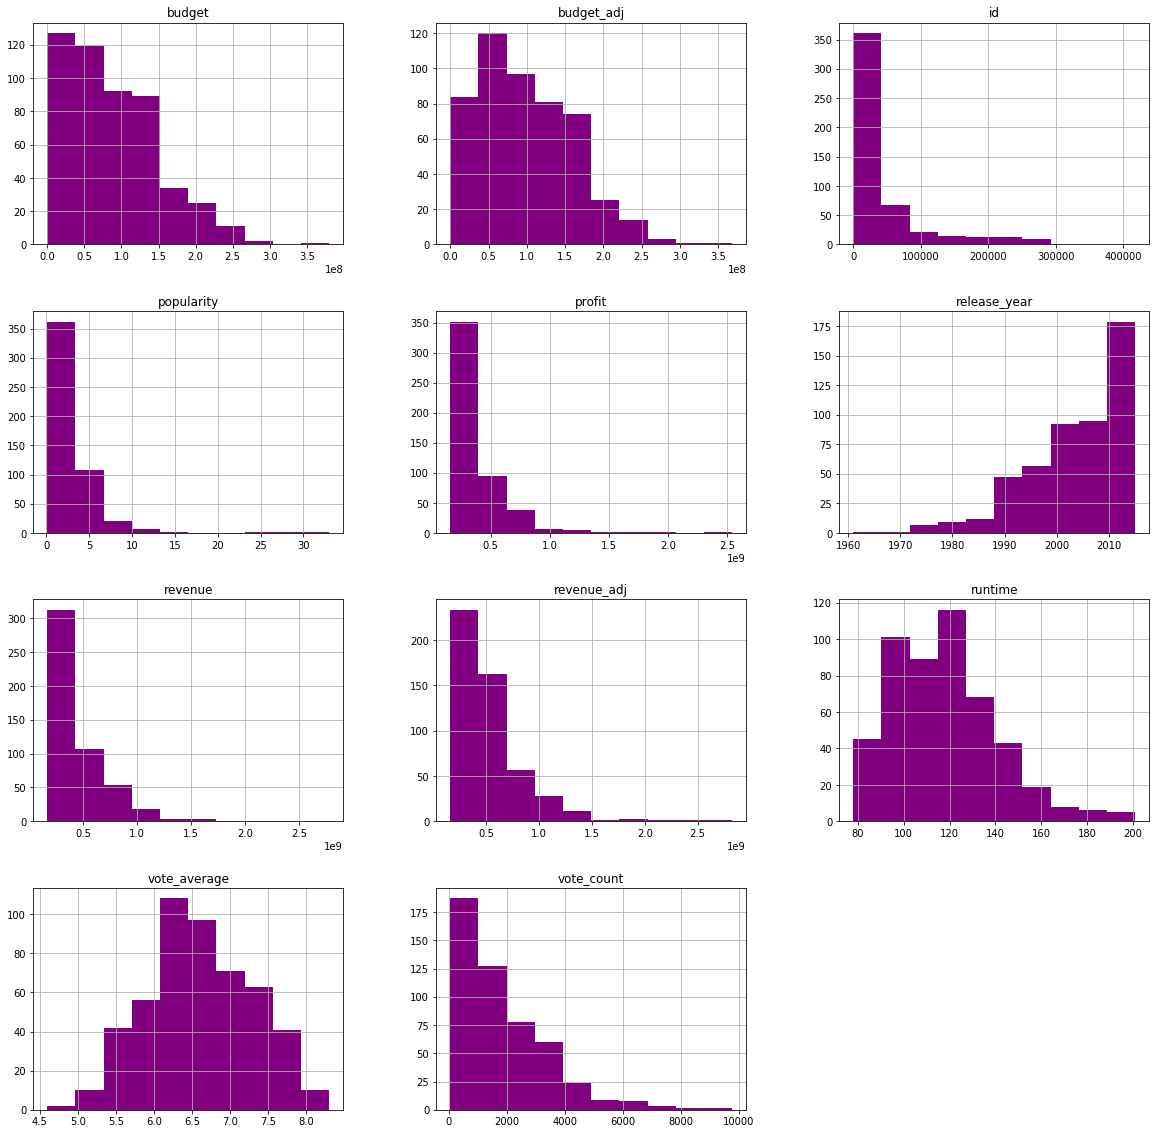

In [473]:
tmdb_pro_500.hist(figsize=(20,20), color = 'purple');

> #### 1.Top 500 Profitable Movie and their genre count 

In [450]:
#top 500 profitable movie and their genre count

genre_count = seperate_keywords(tmdb_pro_500,'genres')
genre_count

Action             210
Adventure          208
Comedy             168
Drama              138
Thriller           136
Family             124
Fantasy            112
Science Fiction    107
Animation           81
Romance             70
Crime               54
Mystery             37
Horror              23
Music               16
War                 14
History              9
Western              4
dtype: int64

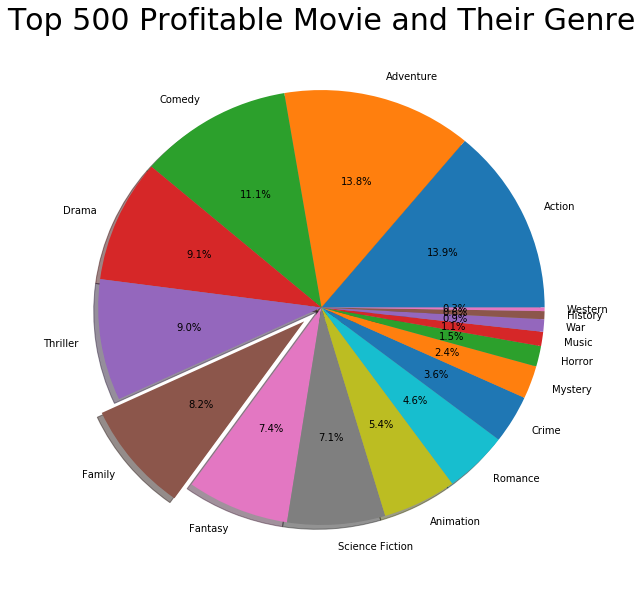

In [451]:
#plot top 500 profitable movie and their genre
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = genre_count.index
sizes = genre_count
explode = (0, 0, 0, 0,0, 0.1, 0, 0,0, 0.0, 0, 0,0, 0,0, 0.0, 0)
plt.figure(figsize(10,10))
plt.title('Top 500 Profitable Movie and Their Genre',fontsize=30)
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.pie(genre_count, explode=explode,labels=labels, autopct='%.1f%%',
        shadow=True, startangle=0)
plt.show()

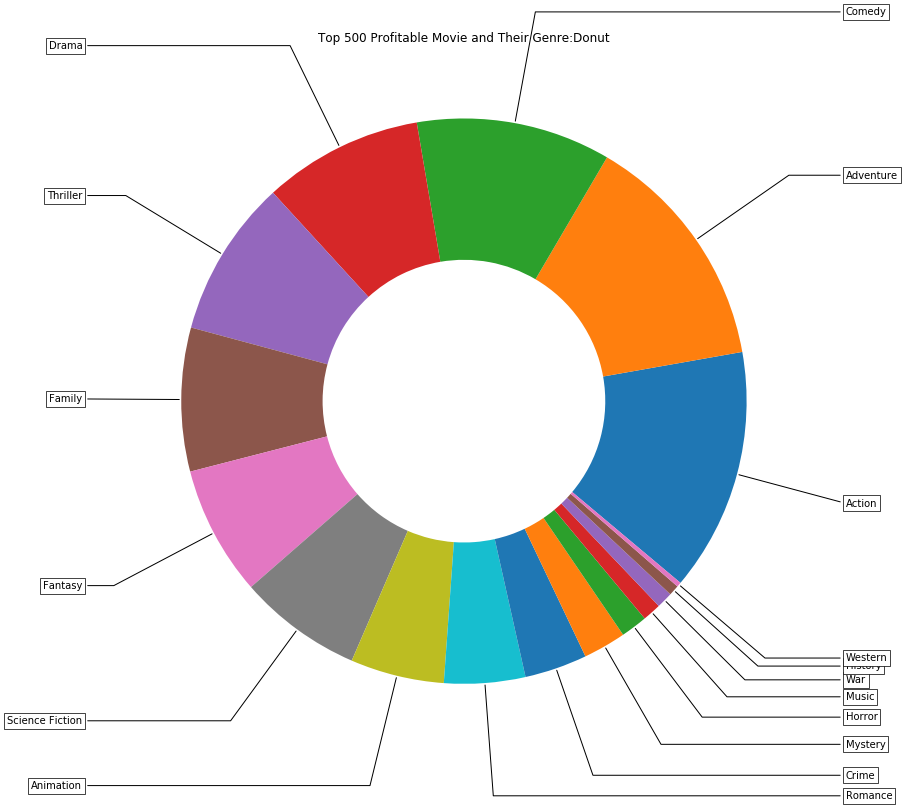

In [452]:
fig, ax = plt.subplots(figsize=(16, 13), subplot_kw=dict(aspect="equal"))
labels = genre_count.index
sizes = genre_count
recipe =genre_count.index
data = genre_count

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Top 500 Profitable Movie and Their Genre:Donut")

plt.show()


> #### 2.which cast or actor is mostly occur in top 500 profitable movie?


In [453]:
cast_count =seperate_keywords(tmdb_pro_500,'cast')
cast_count =cast_count.head(20)

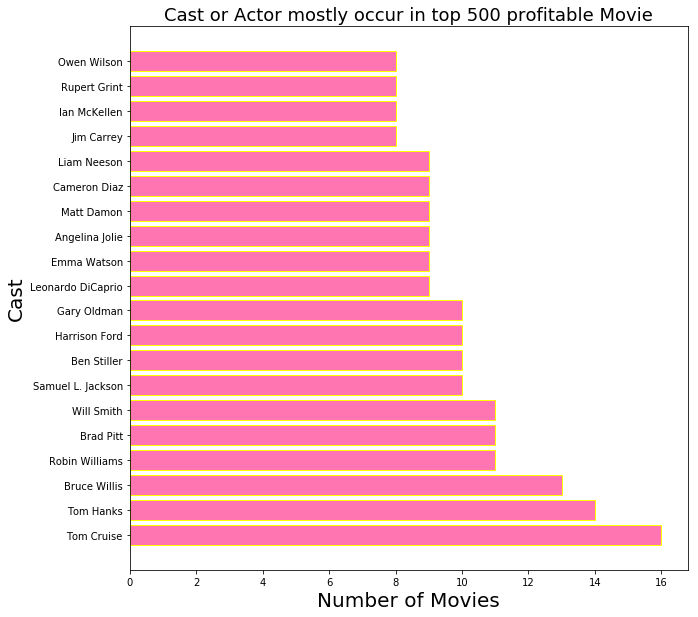

In [454]:
height = cast_count
bars = cast_count.index
y_pos = np.arange(len(bars))
plt.figure(figsize=(10,10))

plt.title('Cast or Actor mostly occur in top 500 profitable Movie',fontsize=18)
plt.xlabel('Number of Movies', fontsize = 20)
plt.ylabel('Cast', fontsize = 20)
# Create horizontal bars
plt.barh(y_pos, height,edgecolor='yellow',color = (1.0,0.1,0.5,0.6))
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()


Here we can see Tom Cruise occur 16 times in top 500 profitable movie which is maximum

> #### Top 10 production house that produces most movie in top 500 profitable movies all time.

In [455]:
production_companies_count =seperate_keywords(tmdb_pro_500,'production_companies')
production_companies_count = production_companies_count.head(10)
production_companies_count

Warner Bros.                              64
Universal Pictures                        59
Paramount Pictures                        55
Twentieth Century Fox Film Corporation    47
Walt Disney Pictures                      46
Columbia Pictures                         32
New Line Cinema                           25
Amblin Entertainment                      24
DreamWorks Animation                      20
Village Roadshow Pictures                 20
dtype: int64

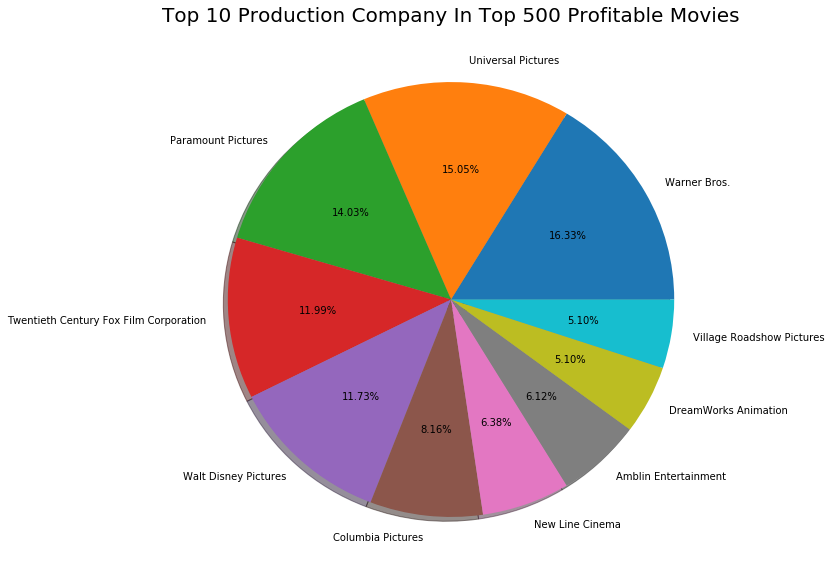

In [456]:
labels = production_companies_count.index
sizes = production_companies_count
plt.title("Top 10 Production Company In Top 500 Profitable Movies",fontsize=20)
plt.pie(production_companies_count, labels=labels, autopct='%.2f%%',shadow=True, startangle=0)
plt.show()

> #### 4.How runtime of top 500 profitable movie are spread and their counts?

In [457]:
tmdb_pro_500['runtime'].describe()

count    500.000000
mean     117.754000
std       22.725897
min       78.000000
25%      100.000000
50%      116.000000
75%      130.250000
max      201.000000
Name: runtime, dtype: float64

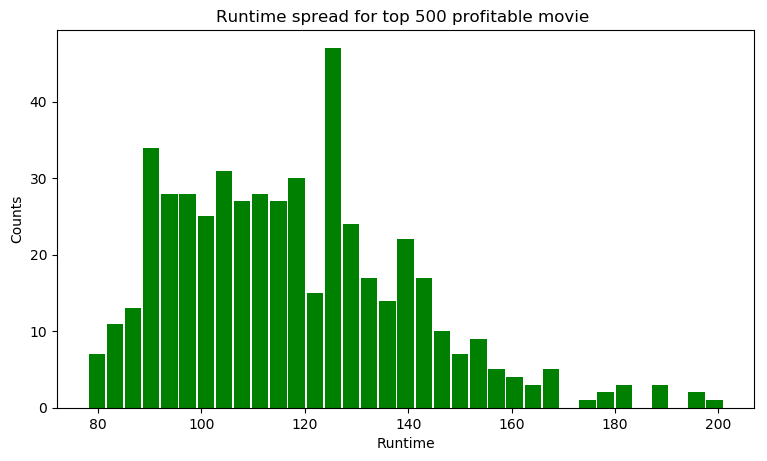

In [458]:
#tmdb_pro_500['runtime'].hist(bins=30)
plt.figure(figsize=(9,5), dpi = 100)
plt.xlabel('Runtime')
plt.ylabel('Counts')
plt.title('Runtime spread for top 500 profitable movie ');
#giving a histogram plot
plt.hist(tmdb_pro_500['runtime'], rwidth = 0.9, bins =35, color = 'green')
#displays the plot
plt.show()

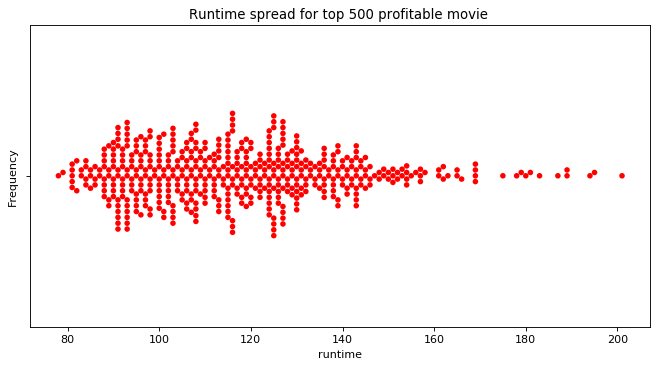

In [459]:
plt.figure(figsize=(10,5), dpi = 80)
plt.title("Runtime spread for top 500 profitable movie ")
plt.ylabel("Frequency")
plt.xlabel("Runtime")
sns.swarmplot(tmdb_pro_500['runtime'], color = 'red')
plt.show()

Runtime has spread highly between 90 minutes and 130 minutes.

> ### 5.Top 500 profitable movies frequently occuring top 10 directors and their count(number of time they directed movie)?

In [460]:
director_count =seperate_keywords(tmdb_pro_500,'director')
director_count =director_count.head(10)
director_count

Steven Spielberg     16
Peter Jackson         7
Robert Zemeckis       6
Ron Howard            6
Michael Bay           6
Carlos Saldanha       6
Chris Columbus        5
Steven Soderbergh     5
John Lasseter         5
Christopher Nolan     5
dtype: int64

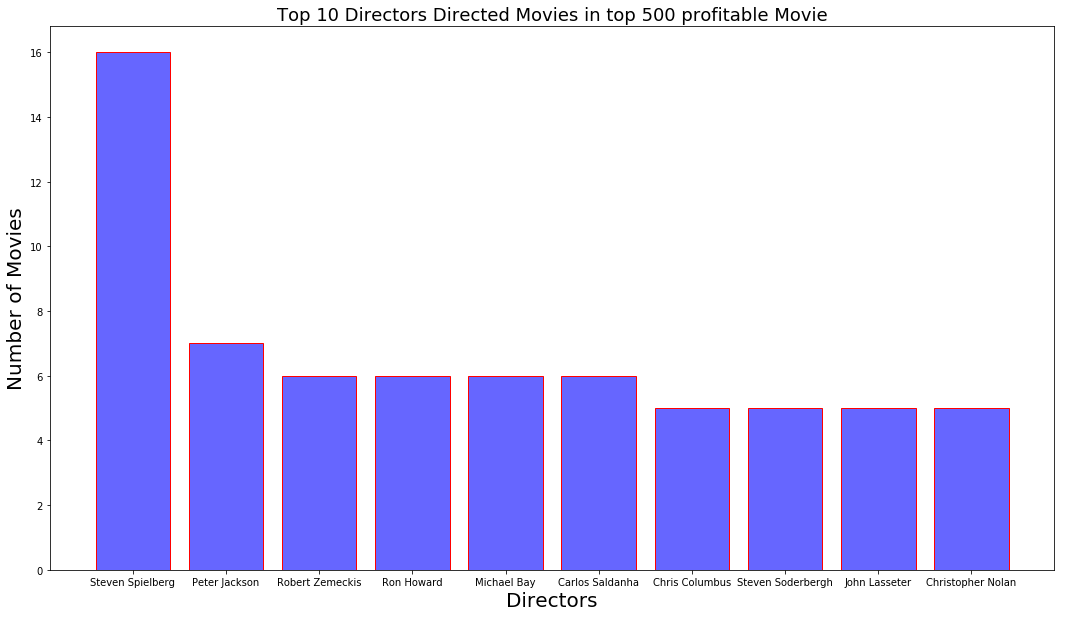

In [461]:
#director_count.plot.bar(figsize=(10,10),fontsize = 17, color = 'blue')
height = director_count
bars = director_count.index
y_pos = np.arange(len(bars))
plt.figure(figsize=(18,10))

plt.title('Top 10 Directors Directed Movies in top 500 profitable Movie',fontsize=18)
plt.ylabel('Number of Movies', fontsize = 20)
plt.xlabel('Directors', fontsize = 20)

# Create horizontal bars
plt.bar(y_pos, height,edgecolor='red',color = (0.0,0.0,1.0,0.6))
 
# Create names on the y-axis
plt.xticks(y_pos, bars, fontsize = 10)

# Show graphic
plt.show()

> 6. ### Total profit earn all movie in particular year vs Year

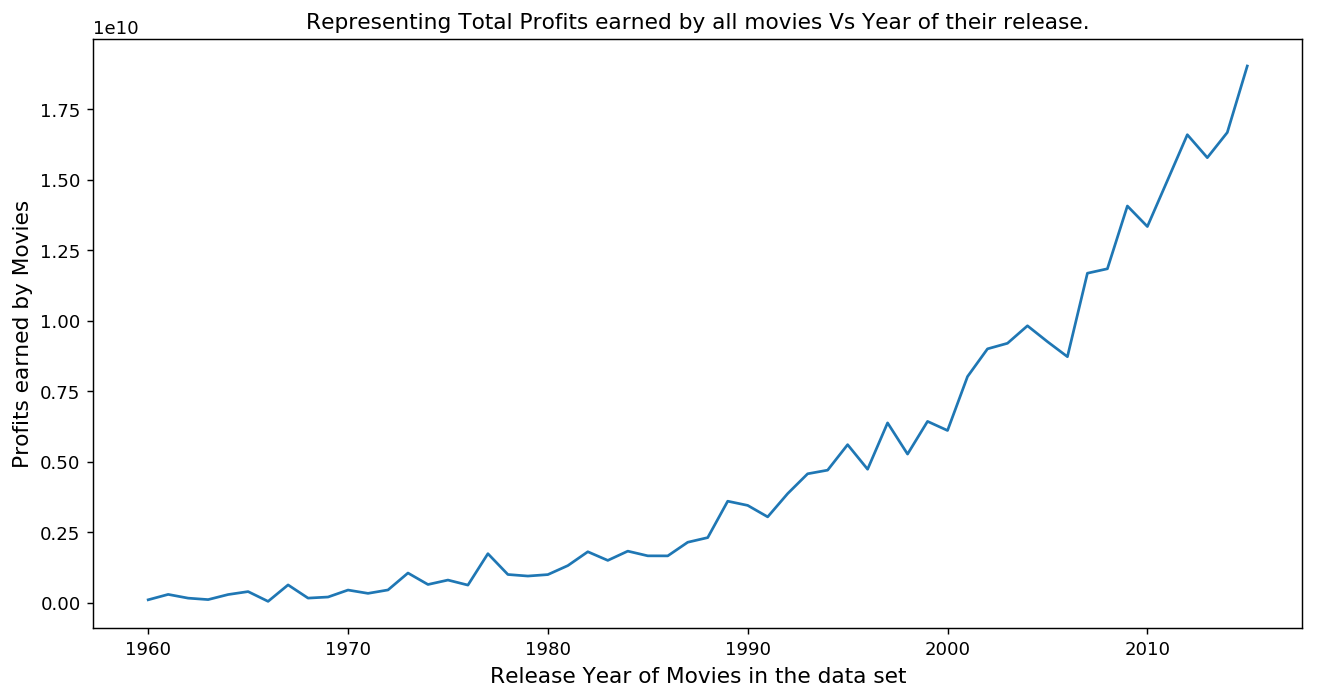

In [462]:
#which year earn the most profit in our top 500 profitable movie of all time
p_year = tmdb_list.groupby('release_year')['profit'].sum()
plt.figure(figsize=(12,6), dpi = 130)
#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(p_year)
plt.show()

 > #### 7.Top 10 production house collboration that generated most profit in top 500 profitable movie alltime.

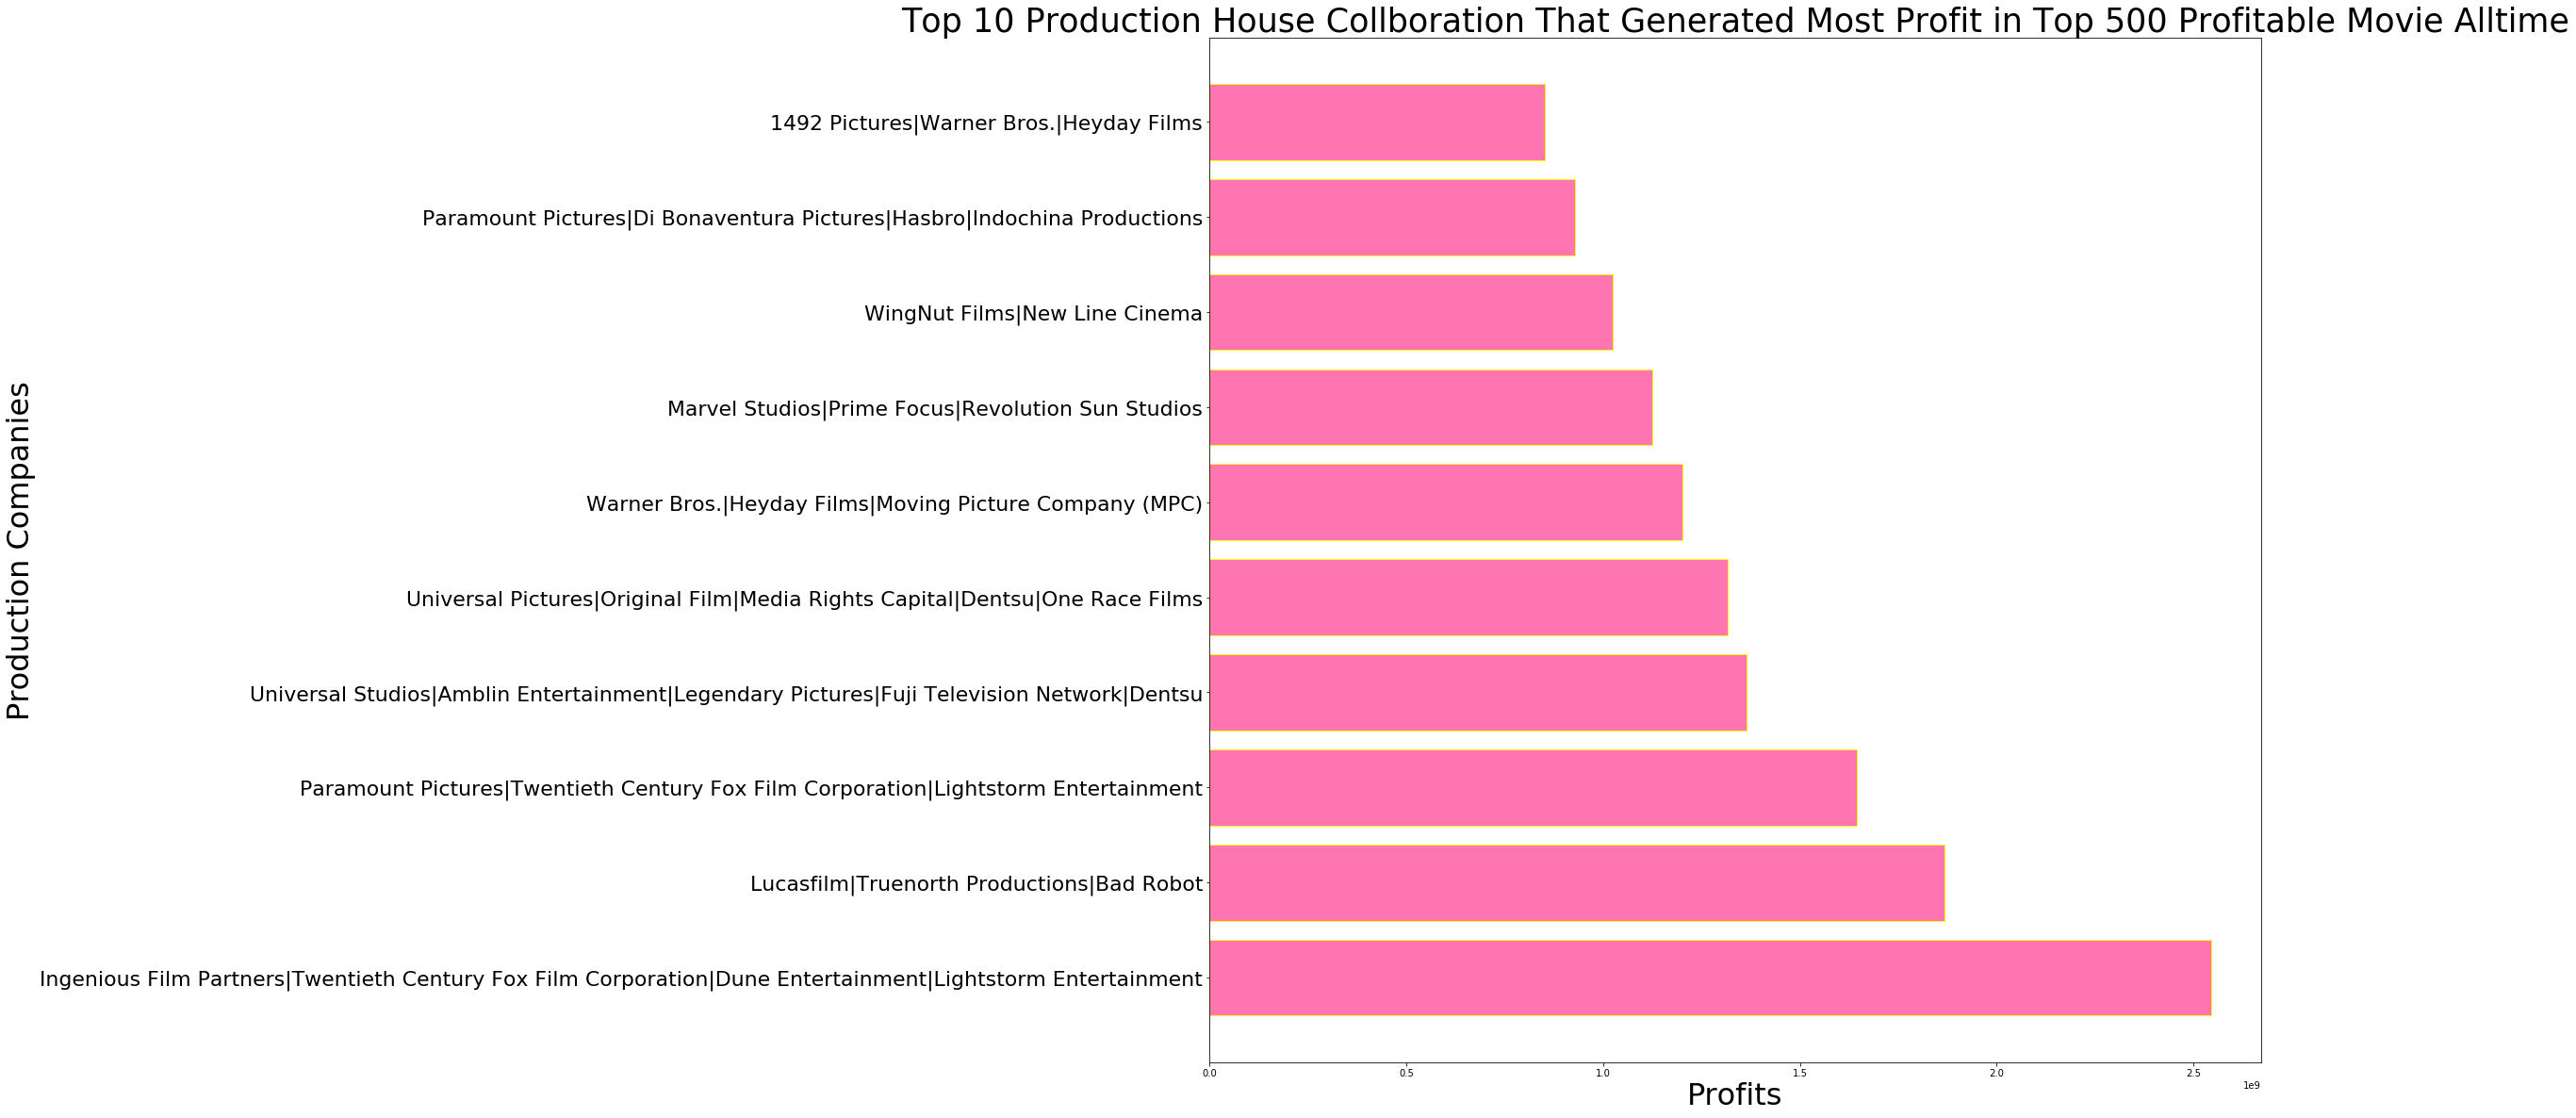

In [463]:
pro_house_colla = tmdb_pro_500.groupby('production_companies')['profit'].mean()
pro_house_colla = pro_house_colla.sort_values(ascending=False).head(10)

height = pro_house_colla
bars = pro_house_colla.index
y_pos = np.arange(len(bars))
plt.figure(figsize=(20,20))

plt.title('Top 10 Production House Collboration That Generated Most Profit in Top 500 Profitable Movie Alltime',fontsize=35)
plt.xlabel('Profits', fontsize = 32)
plt.ylabel('Production Companies', fontsize = 32)
# Create horizontal bars
plt.barh(y_pos, height,edgecolor='yellow',color = (1.0,0.1,0.5,0.6))
 
# Create names on the y-axis
plt.yticks(y_pos, bars,fontsize=22)

# Show graphic
plt.show()

### Research Question 2  

> ### Does Popularity of movie depend on budget because higher budget lead to high spending of advertisement and movie promotion?

> ### Does Popularity of movie leads to high revenue ?

> ### Does popularity of movie industry  changes over time and How?

In [464]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

# What kinds of properties are associated with movies that have high revenues and high budget?
budget_sorted = tmdb_list.sort_values('budget',ascending=False)
revenue_sorted = tmdb_list.sort_values('revenue',ascending=False)
top_budget_100 = budget_sorted.head(100)

> ### Does Popularity of movie leads to high revenue ?

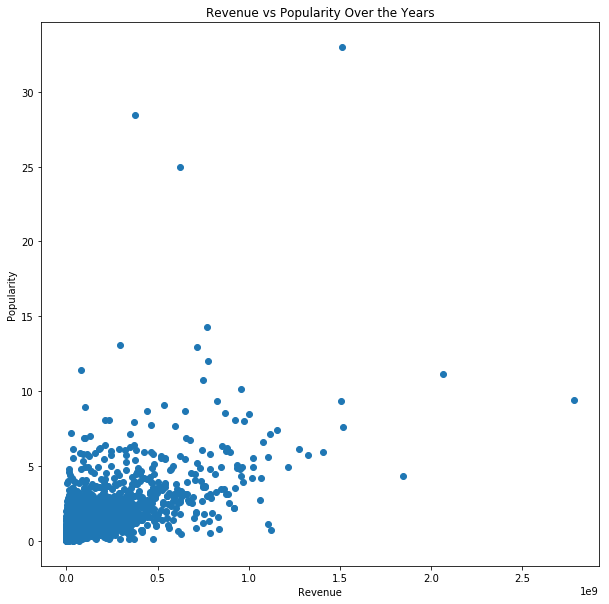

In [465]:
#how popularity and revenue realated(for observing popularity cause movie to earn more or not)
plt.xlabel('Revenue')
plt.ylabel('Popularity')
plt.title('Revenue vs Popularity Over the Years');
plt.scatter(x=revenue_sorted['revenue'], y=revenue_sorted['popularity'])


#### Plot analaysis : So here no correlation seen between the revenue and popularity ,So we can not say high awareness about some movie between people can not gurantee to make high revenue.

> ### Does Popularity of movie depend on budget because higher budget lead to high spending of advertisement and movie promotion?

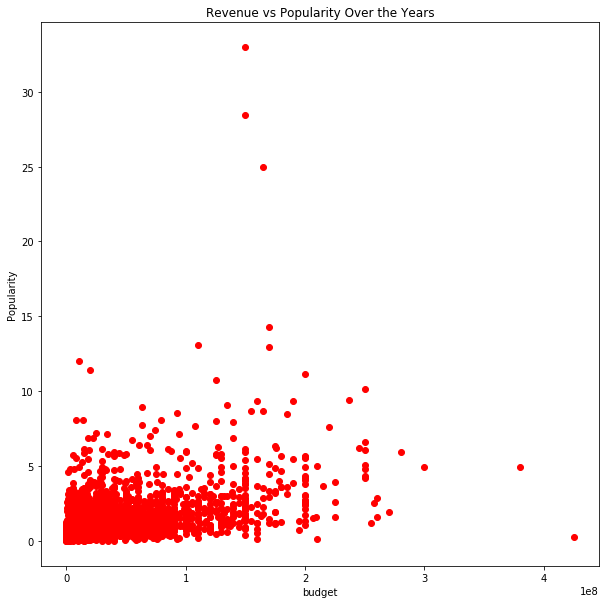

In [466]:
#how pouplarity and budget related(for obeserving whehther budget increment leads to more popularity or not)
#beecause budget related to marketing and other promotion also
plt.xlabel('budget')
plt.ylabel('Popularity')
plt.title('Revenue vs Popularity Over the Years');
plt.scatter(x=revenue_sorted['budget'], y=revenue_sorted['popularity'],color = 'red')


> #### Scatter plot between popularity vs budget shows their is no clear correlation between budget and popularity,so spending too muc h in marketing and advertsing does not necessary increase or cause to increasing in popularity. 
> #### So,here general philosphy of people for example, high budget with include high marketing and adverting campaign budget increase popularity fails. So high budget of movie does not cause high popularity.

## Does Popularity of Movie Industry Changes Over Time and How?

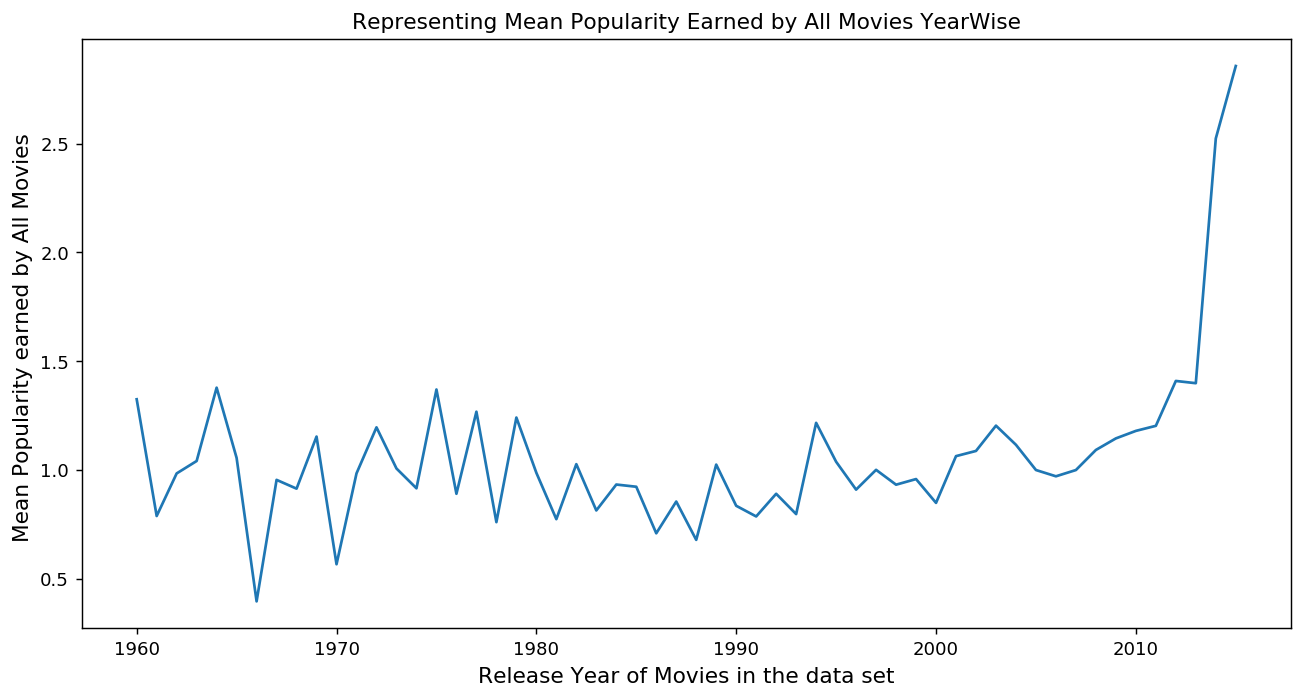

In [467]:
#how popularity of movies per year changes... it can relate to overall movie popularity 
lm = tmdb_list.groupby('release_year')['popularity'].mean()

plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Mean Popularity earned by All Movies ', fontsize = 12)
#title of the line plot
plt.title('Representing Mean Popularity Earned by All Movies YearWise')

#plotting the graph
plt.plot(lm)

#displaying the line plot
plt.show()

> #### Here the plot shows the mean popularity of all movies yearly So curve shows overall Movie industry popularity increses with time overall for all movie.
> #### Here we are considering all movie popularity on that corresponding year ,it increases dramatically it shows year after year movie industry popularity increases between people..it can happen due to various factor.

<a id='conclusions'></a>
## Conclusions


-   ### In The end,We explored some question and based on that we filter and got some intresting result:

> -  #### What kinds of properties are associated with top 500 profitable movies of all time?

##### Top 500 Profitable Movie Most Occuring Genre :
 - Adventure ,Action,Comedy,Drama,Thriller,Family etc.

##### Top 500 Profitable Movie Frequently Occuring Cast respectively : 
 - Tom Cruise,Tom Hanks,Bruce Wiliis etc.
 
##### Top 500 Profitable Movie Top Production Companies :
 - Warner Bros,Universal Pictures,Paramount Pictures  etc.
 
##### Top 500 Profitable Movie : Runtime has spread densely between 90 minutes and 130 minutes.

##### Top 500 Profitable Movie Top Directors :
 - Steven Spielberg,Peter Jackson,Carlos Saldanha etc.

##### Observing all the movie data profit ,We can say Overall Every Year Profit generated by all the movie are keep incresing.So,It mean Movie Industries Bussiness shows more promising career.

##### Then We shown Frequenly occuring production house collaboaration in top 500 profitable movie.

--------------------------------------------
> - #### There in second major question we Shown how popularity does not shows correlation  with budget and revenue directly. 

**In Last We concluded Movie industry Popularity increasing over year by year,So Every year in generic term movies more discuss by people than previous year Which is Promising for Movie Industry.**



**Limitations** : My conclusion and analysis shows major characteristic of top 500 profitable movie.So by that report,we can imply that for creating profitable movie following are the best:
 -   Production Company : Warner Bros
 -   Actor : Tom Cruise
 -   Director : Steven Spielberg  and etc.
    
But Here we are calculating and predicting result based on rating of movie dataset and we are correlating entity based on that so correlation does not mean causation.We can not say which one term neccesarily or definately mean other to follow.


**References**:

https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html

https://www.reddit.com/r/learnpython/comments/4sz7op/how_to_modify_title_and_labels_of_fontsize_in/hhggyggg

https://matplotlib.org/tutorials/index.html